#BEFORE RUNING FINTUNE THIS PARAMAS
###### This affect speed or executing of the notebook!

In [ ]:
NUM_IMAGE = 4000 #number of images to be used to train th model

# DELETE THIS CASE AFTER !!!!! 

In [1]:
# make sure to accept kaggle project rule
# !echo "{\"username\":\"<your kaggle username>\",\"key\":\"<you kaggle key for this project>\"}" > kaggle.json
# !cat kaggle.json

In [ ]:
!ls -la

total 1691432
drwxr-xr-x 1 root root      4096 Dec 30 20:31 .
drwxr-xr-x 1 root root      4096 Dec 30 20:20 ..
-rw-r--r-- 1 root root   2114740 Apr 30  2021 caat.jpg
drwxr-xr-x 4 root root      4096 Dec 20 20:18 .config
-rw-r--r-- 1 root root 851576689 Dec 30 20:29 dogs-vs-cats.zip
-rw-r--r-- 1 root root        70 Dec 30 21:10 kaggle.json
drwxr-xr-x 2 root root   1048576 Dec 30 20:39 resized_images
drwxr-xr-x 1 root root      4096 Dec 20 20:19 sample_data
-rw-r--r-- 1 root root     88903 Dec 30 20:36 sampleSubmission.csv
drwxr-xr-x 2 root root    331776 Dec 30 20:29 test1
-rw-r--r-- 1 root root 284321224 Dec 30 20:36 test1.zip
drwxr-xr-x 2 root root      4096 Dec 30 20:31 test_predict_images
drwxr-xr-x 2 root root    782336 Dec 30 20:29 train
-rw-r--r-- 1 root root 569546721 Dec 30 20:36 train.zip
-rw-r--r-- 1 root root  11079910 Dec 30 20:36 transfer_learning_dog_vs_cat.csv
-rw-r--r-- 1 root root  11079910 Dec 30 20:35 transfer_learning_dog_vs_cat.sav


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -la ~/.kaggle/kaggle.json

-rw------- 1 root root 70 Dec 30 21:10 /root/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

def extract(zip_path:str):
  """
  zip_path : path of the zip file to extract.
  """
  with ZipFile(zip_path, 'r') as zip:
    print('Extracting...')
    zip.extractall()
    print('Extracting : Done!')


In [ ]:
#Extract dataset
dataset_zip = "/content/dogs-vs-cats.zip"

extract(dataset_zip)


Extracting...
Extracting : Done!


In [ ]:
#extract train data
trainset_zip = "/content/train.zip"

extract(trainset_zip)

Extracting...
Extracting : Done!


In [ ]:
#extract test data 
testset_zip = "/content/test1.zip"

extract(testset_zip)

Extracting...
Extracting : Done!


In [ ]:
import os

paths, dirs, files = next(os.walk("/content/train/"))

print("length of the train data :", len(files))

length of the train data : 25000


In [ ]:
set([i[:3] for i in files])

{'cat', 'dog'}

#Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from glob import glob


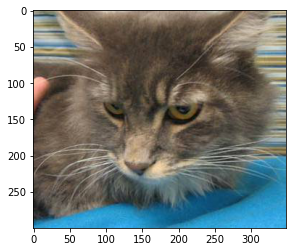

In [ ]:
import matplotlib.image as mplim
import matplotlib.pyplot as plt

def show_img(image_path:str):
  """
  image_path : (str) path of the image to show
  """
  image = mplim.imread(image_path)
  plt.imshow(image) 

image_path = paths + files[4] # ref : cat image in index 0 | dog image in index 1
show_img(image_path)

In [ ]:
image_labels = [i[:3] for i in files]
print("cat image count :", image_labels.count('cat'))
print("dog image count :", image_labels.count('dog'))


cat image count : 12500
dog image count : 12500


In [ ]:
#image labels for the number of image selected to be trained check : print(NUM_IMAGE) 
image_labels = [i[:3] for i in files[:NUM_IMAGE]]

In [ ]:
from PIL import Image

!mkdir -p resized_images
resized_path = '/content/resized_images/'

images = list(map(lambda x: paths + x, files[:NUM_IMAGE]))

print('resizing images...')
for img in images:

  image = Image.open(img)
  resized_image = image.resize((224,224))
  resized_image.save(img.replace('/content/train/', resized_path))
  # resized_image.save(resized_path)

print('resizing images DONE!')

resizing images...
resizing images DONE!


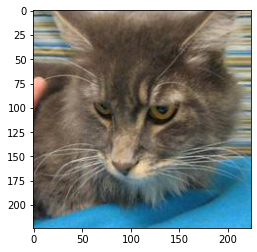

In [ ]:
#resized image 224x224
show_img('/content/resized_images/'+files[4])


In [ ]:
"""
labels :
  cat = 0
  dog = 1
"""
labels = list(map(lambda x: 1 if x=='dog' else 0, image_labels))
print(labels)

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 

In [ ]:
import cv2
files = files[:NUM_IMAGE]
X = np.asarray([cv2.imread(resized_path+file) for file in files])
Y = np.array(labels)

In [ ]:
# X 
print('X shape : ',X.shape)
print('Y shape : ', Y.shape)

X shape :  (4000, 224, 224, 3)
Y shape :  (4000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=314, test_size=0.2)
def shape(x):
  """
  After 20min of debug/research I found that :
   '==' -> check values 
   'is' -> check pointers (memory location => use id(some_var) to see it)
   So 
   [name for name in globals() if globals()[name] == x][0] => won't work :).
  """
  x_name = [name for name in globals() if globals()[name] is x][0]
  print(f'{x_name} shape : ', x.shape)

shape(X_train)
shape(X_test)
shape(Y_train)
shape(Y_test)
# dir(X_train)

X_train shape :  (3200, 224, 224, 3)
X_test shape :  (800, 224, 224, 3)
Y_train shape :  (3200,)
Y_test shape :  (800,)


In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


mobile_net_hub = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_hub = hub.KerasLayer(mobile_net_hub, trainable=False, input_shape=(224,224,3))

In [ ]:
output_shape = 2 #two classes Cat | Dog
model = tf.keras.Sequential([
    pretrained_hub,
    tf.keras.layers.Dense(output_shape, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 17s 49ms/step - loss: 0.1432 - accuracy: 0.9438
Epoch 2/10
100/100 [==============================] - 4s 42ms/step - loss: 0.0637 - accuracy: 0.9775
Epoch 3/10
100/100 [==============================] - 4s 41ms/step - loss: 0.0503 - accuracy: 0.9831
Epoch 4/10
100/100 [==============================] - 4s 41ms/step - loss: 0.0434 - accuracy: 0.9850
Epoch 5/10
100/100 [==============================] - 4s 42ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 6/10
100/100 [==============================] - 4s 41ms/step - loss: 0.0303 - accuracy: 0.9922
Epoch 7/10
100/100 [==============================] - 4s 41ms/step - loss: 0.0264 - accuracy: 0.9937
Epoch 8/10
100/100 [==============================] - 4s 42ms/step - loss: 0.0242 - accuracy: 0.9934
Epoch 9/10
100/100 [==============================] - 4s 42ms/step - loss: 0.0196 - accuracy: 0.9966
Epoch 10/10
100/100 [==============================] - 4s 42ms/step - loss: 0.0176 - accuracy: 0.9962

In [ ]:
score, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Loss : ', score)
print('Test Accuracy : ', accuracy)

25/25 [==============================] - 2s 42ms/step - loss: 0.0495 - accuracy: 0.9825
Test Loss :  0.04954665154218674
Test Accuracy :  0.9825000166893005


In [ ]:
model.save("transfer_learning_dog_vs_cat.h5")

# save/load model using pickle and predict

In [ ]:
import pickle

pickle.dump(model, open('transfer_learning_dog_vs_cat.sav', 'wb'))

In [ ]:
!wget -O caat.jpg https://www.hdnicewallpapers.com/Walls/Big/Cat/Animal_Cat_Shocking_Photo.jpg


--2022-12-30 21:12:52--  https://www.hdnicewallpapers.com/Walls/Big/Cat/Animal_Cat_Shocking_Photo.jpg
Resolving www.hdnicewallpapers.com (www.hdnicewallpapers.com)... 182.50.135.91
Connecting to www.hdnicewallpapers.com (www.hdnicewallpapers.com)|182.50.135.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2114740 (2.0M) [image/jpeg]
Saving to: ‘caat.jpg’

caat.jpg            100%[===================>]   2.02M  --.-KB/s    in 0.1s    

2022-12-30 21:12:52 (19.8 MB/s) - ‘caat.jpg’ saved [2114740/2114740]



In [ ]:
import os
def predict(urli, web=False):
  """
  Make sure you imported os library : import os
  web : True if you give a external path/url
  labels :
    cat = 0
    dog = 1
  """
  
  if web:
    dir = '/content/test_predict_images'
    os.system(f'mkdir -p {dir}')

    dir = dir+ '/' +urli.split('/')[-1]
    # !wget --output-document=dir + '/' + name urli
    os.system(f"wget --output-document={dir} {urli}")
    image_path = dir
  # read/show image : 

  image = cv2.imread(image_path)
  show_img(image_path)

  # resize image :
  image = cv2.resize(image, (224,224))
  # rescale image : 
  rescaled_img = image / 255
  # reshape image : 
  input_image = np.reshape(rescaled_img, [1,224,224,3])


  prediction = model.predict(input_image)
  print(f"{'*' * 20} \nLabels : \n\tCat => 0\n\tDog => 1 \n{'*' * 20}\n\n",)
  print(prediction)
  if np.argmax(prediction) == 0 :
    print(f'\nThis image represent a Cat (confident ratio : {prediction[0][0]*100:.2f}% )')
  else: 
    print(f'\nThis image represent a Dog (confident ratio : {prediction[0][1]*100:.2f}% )')



In [ ]:
urli = "https://www.newshub.co.nz/home/lifestyle/2019/11/dog-years-are-a-myth-2-year-old-dogs-already-middle-aged-scientists/_jcr_content/par/video/image.dynimg.1280.q75.jpg/v1574572358818/GETTY-labrador-puppy-1120.jpg"

import os
dir = '/content/test_predict_images/'
!mkdir -p '/content/test_predict_images'

name = urli.split('/')[-1]
print(dir+name)



/content/test_predict_images/GETTY-labrador-puppy-1120.jpg


1/1 [==============================] - 1s 760ms/step
******************** 
Labels : 
	Cat => 0
	Dog => 1 
********************


[[0.98117894 0.01882107]]

This image represent a Cat (confident ratio : 98.12% )


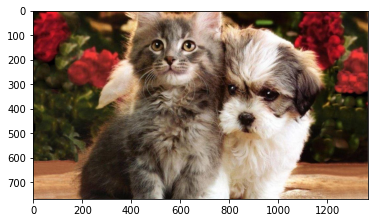

In [ ]:
url = "https://wallpapercave.com/wp/5DQ9QWM.jpg"
predict(url,web=True)